In [1]:
random_state = 4392

# Machine-Learning

### Recommendations: Linear Reg, DTRegression, NeuralNetwork, SVM, LogisticReg

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import shap

from sklearn.model_selection import train_test_split # Random Split
from sklearn.metrics import r2_score, mean_squared_error, explained_variance_score
from sklearn.preprocessing import StandardScaler

from sklearn import set_config
set_config(transform_output="pandas") # Keeps feature names after pipeline

In [3]:
def calculate_score(y_true, y_pred):
    print(f"R2 Score {r2_score(y_true, y_pred)}")
    print(f"RMSE : {np.sqrt(mean_squared_error(y_true, y_pred))}")

def plot(y_true, y_pred):
    # Plotly express plot
    h = pd.DataFrame(data={'Actual y':y_true, 'Predicted y': y_pred})
    fig = px.scatter(h, x='Actual y', y='Predicted y')
    fig.show()

In [4]:
df = pd.read_csv('data/clean_listing.csv')
df.head()

,Unnamed: 0,neighbourhood_cleansed_Ang Mo Kio,neighbourhood_cleansed_Bedok,neighbourhood_cleansed_Bishan,neighbourhood_cleansed_Bukit Batok,neighbourhood_cleansed_Bukit Merah,neighbourhood_cleansed_Bukit Panjang,neighbourhood_cleansed_Bukit Timah,neighbourhood_cleansed_Central Water Catchment,neighbourhood_cleansed_Choa Chu Kang,...,Pool,Extra pillows and blankets,Coffee,Private entrance,host_since_years,distance_from_MRT,distance_from_Bus,distance_from_Mall,distance_from_School,distance_from_Food
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,True,True,12,0.842953,0.180102,7.976199,3.515767,0.785094
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,True,False,12,0.880282,0.205346,7.952045,3.786036,0.502588
2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,False,False,False,False,12,0.549557,0.117975,4.230675,1.095807,0.169376
3,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,False,False,False,False,12,0.609339,0.040906,3.862544,0.685090,0.208523
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,True,12,0.738518,0.210803,7.816646,3.809634,0.506811


In [5]:
print(f"The standard deviation of price of listing is ${df['price'].std():.2f}.")

The standard deviation of price of listing is $132.36.


In [6]:
# Split data and drop unnecessary data
Y = df['price']
X = df.drop(['price', 'Unnamed: 0', 'latitude', 'longitude'], axis=1)
X = X.astype('float64')

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=45)

In [8]:
X.head()

,neighbourhood_cleansed_Ang Mo Kio,neighbourhood_cleansed_Bedok,neighbourhood_cleansed_Bishan,neighbourhood_cleansed_Bukit Batok,neighbourhood_cleansed_Bukit Merah,neighbourhood_cleansed_Bukit Panjang,neighbourhood_cleansed_Bukit Timah,neighbourhood_cleansed_Central Water Catchment,neighbourhood_cleansed_Choa Chu Kang,neighbourhood_cleansed_Clementi,...,Pool,Extra pillows and blankets,Coffee,Private entrance,host_since_years,distance_from_MRT,distance_from_Bus,distance_from_Mall,distance_from_School,distance_from_Food
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,12.0,0.842953,0.180102,7.976199,3.515767,0.785094
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,12.0,0.880282,0.205346,7.952045,3.786036,0.502588
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,12.0,0.549557,0.117975,4.230675,1.095807,0.169376
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,12.0,0.609339,0.040906,3.862544,0.685090,0.208523
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,12.0,0.738518,0.210803,7.816646,3.809634,0.506811


# Part 1:
Finding a model that best predicts price. We will being trying :
- linear model: Linear Regression
- tree-based model: HistGradientBoostRegressor, XGBoost
- and to try something new: Neural Network.

We will be using $R^2$ score to compare the goodness of the model, and RMSE to find the accuracy of the prediction.

### Model 1: Linear Regression

In [9]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)

print(f"Train\n Score: {model.score(X_train, y_train)}")
calculate_score(y_train, y_train_pred)

print(f"Test\n Score: {model.score(X_test, y_test)}")
calculate_score(y_test, y_pred)

plot(y_test, y_pred)

Train
 Score: 0.6131626649085447
R2 Score 0.6131626649085447
RMSE : 82.73377935660328
Test
 Score: 0.6094672796941423
R2 Score 0.6094672796941423
RMSE : 80.9760550427124


In [10]:
# explainer = shap.Explainer(model.predict, X_test)
# shap_values = explainer(X)
# shap.plots.waterfall(shap_values[20], max_display=14)

In [11]:
# for i in range(X.shape[1]):
#     print(X.columns[i], "=", model.coef_[i].round(5))

### Model 2: Gradient Boost Regressor

We can use gradient boosting - a type of ensemble machine learning algorithms. Ensemble is a collection of decision trees. Every iteration, a decision tree is added to model to minimise the error. Models are fit using any arbitrary differentiable loss function and gradient descent optimization algorithm, and the goal is to minimise loss gradient. We will be using HistGradientBoostingRegressor from sklearn.

In [12]:
from sklearn.ensemble import HistGradientBoostingRegressor

reg = HistGradientBoostingRegressor(random_state=random_state)

reg.fit(X_train, y_train)

y_train_pred = reg.predict(X_train)
y_pred = reg.predict(X_test)

print(f"Train\nScore: {reg.score(X_train, y_train)}")
calculate_score(y_train, y_train_pred)

print(f"Test\nScore: {reg.score(X_test, y_test)}")
calculate_score(y_test, y_pred)

plot(y_test, y_pred)

Train
Score: 0.9473052504241182
R2 Score 0.9473052504241182
RMSE : 30.535310804375417
Test
Score: 0.7640520525218855
R2 Score 0.7640520525218855
RMSE : 62.941342768477845


### Model 3: XGBoost Regression

We can use gradient boosting - a type of ensemble machine learning algorithms. Ensemble is a collection of decision trees. Every iteration, a decision tree is added to model to minimise the error. Models are fit using any arbitrary differentiable loss function and gradient descent optimization algorithm, and the goal is to minimise loss gradient. We will use XGBoost API to do the model fitting.

Train
Score:1.0
R2 Score 0.9907481501980658
RMSE : 12.794784018083211
Test
Score:0.7729414478612586
R2 Score 0.7729414478612586
RMSE : 61.74429468712888


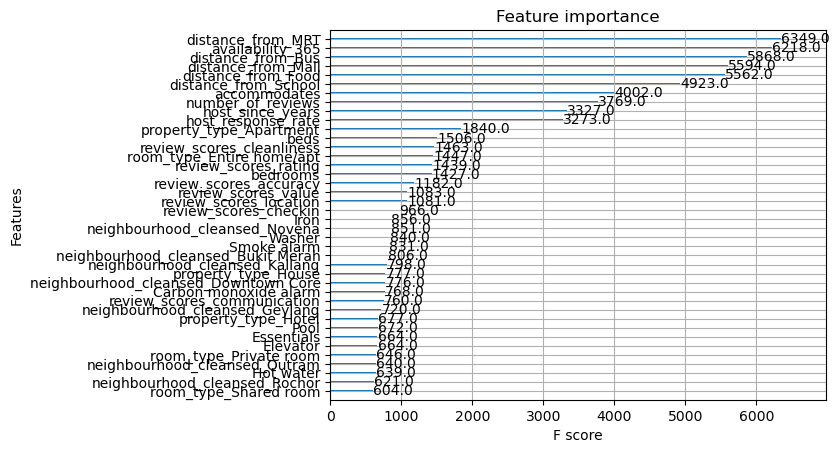

In [13]:
import xgboost as xgb

model = xgb.sklearn.XGBRegressor(tree_method='hist', objective='reg:squarederror', n_estimators = 2500,
                         learning_rate=0.01, random_state=random_state)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

print(f"Train\nScore:{model.score(X_train, y_train_pred)}")
calculate_score(y_train, y_train_pred)

print(f"Test\nScore:{model.score(X_test, y_test)}")
calculate_score(y_test, y_pred)

xgb.plot_importance(model.get_booster(), max_num_features=40)

plot(y_test, y_pred)

In [14]:
# explainer = shap.TreeExplainer(model)
# shap_values = explainer.shap_values(X)
# shap.summary_plot(shap_values, X)

### Model 4: Neural Networks

In [15]:
X_train, X_val_and_test, y_train, y_val_and_test = train_test_split(X, Y, test_size=0.33, random_state=101)

s_scaler = StandardScaler()
X_train = s_scaler.fit_transform(X_train.astype(np.float64))
X_val_and_test = s_scaler.transform(X_val_and_test.astype(np.float64))

X_val, X_test, y_val, y_test = train_test_split(X_val_and_test, y_val_and_test, test_size=0.5)

In [16]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(256, activation='linear', input_shape=(len(X_val.columns), )))
model.add(Dense(128, activation='linear'))
model.add(Dense(64, activation='linear'))
model.add(Dense(32, activation='linear'))
model.add(Dense(16, activation='linear'))
model.add(Dense(8, activation='linear'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam')

Input (n layers) -> Hidden Layer(s) (256, 128, ..., 8) -> Output (1 layer): Price

In [17]:
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=128,epochs=600)
model.summary()

Epoch 1/600


2023-04-14 20:56:35.370695: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


15/15 [==============================] - 0s 6ms/step - loss: 47235.0742 - val_loss: 38978.9922
Epoch 2/600
15/15 [==============================] - 0s 2ms/step - loss: 39468.1914 - val_loss: 34384.4453
Epoch 3/600
15/15 [==============================] - 0s 2ms/step - loss: 34242.7344 - val_loss: 27550.2305
Epoch 4/600
15/15 [==============================] - 0s 2ms/step - loss: 25486.1797 - val_loss: 17193.5137
Epoch 5/600
15/15 [==============================] - 0s 2ms/step - loss: 13007.4756 - val_loss: 8170.5049
Epoch 6/600
15/15 [==============================] - 0s 2ms/step - loss: 8778.4590 - val_loss: 7368.2046
Epoch 7/600
15/15 [==============================] - 0s 2ms/step - loss: 8175.4531 - val_loss: 6833.2515
Epoch 8/600
15/15 [==============================] - 0s 2ms/step - loss: 7828.0605 - val_loss: 6675.4160
Epoch 9/600
15/15 [==============================] - 0s 2ms/step - loss: 8041.5415 - val_loss: 6692.1685
Epoch 10/600
15/15 [==============================] - 0s 2

<Axes: >

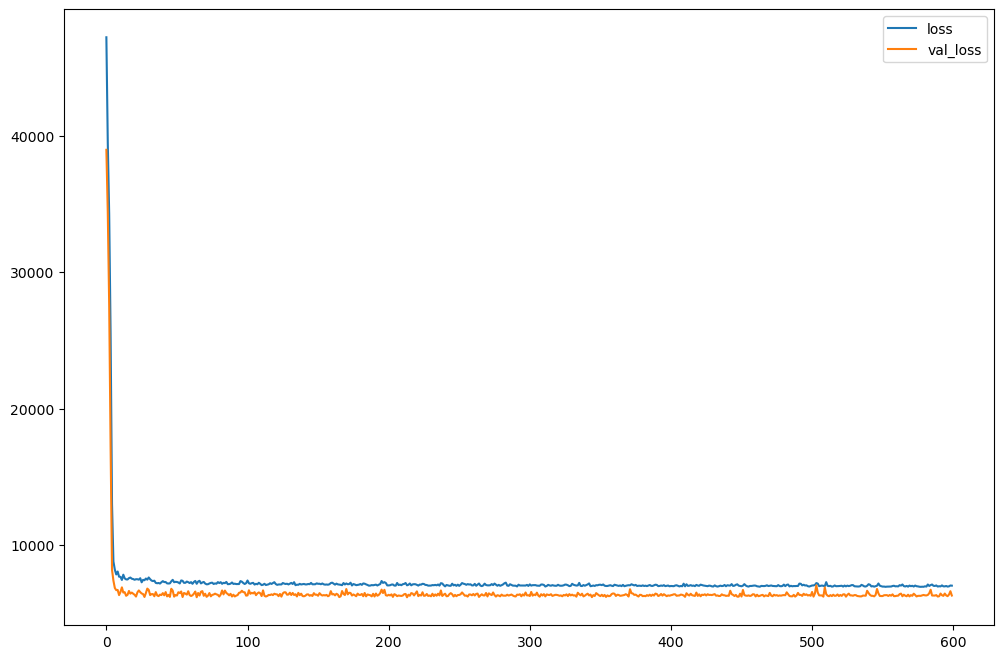

In [18]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot(figsize=(12,8))


In [19]:
y_pred = model.predict(X_test)
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R^2 Score:',explained_variance_score(y_test,y_pred))
# Visualizing Our predictions

y_pred = np.array(y_pred).flatten()
y_test = np.array(y_test)

plot(y_test, y_pred)


15/15 [==============================] - 0s 485us/step
RMSE: 79.25911750967121
R^2 Score: 0.6414568639385894


We can conclude that HistGradientBoostingRegressor and XGBoost Regressor achieve the best results, with the lowest RMSE (~60) and the higher R^2 score (~0.75). All other models achieve decent results, with RMSE around half of standard deviation, and R^2 > 0.5.

# Part 2: Optimising models

We will be using GridSearchCV to find the optimal parameters.

In [20]:
from sklearn.model_selection import GridSearchCV

model = HistGradientBoostingRegressor(random_state=random_state)#.fit(X_train, y_train)

params_grid = {
    'learning_rate': [0.1, 0.15, 0.2, 0.3],
    'max_iter': [80, 100, 120],
    'max_leaf_nodes': [18, 31, 38, 44],
    # 'l2_regularization': [0, 1, 2],
}

cv = GridSearchCV(estimator=model, param_grid=params_grid, cv=5, n_jobs=-1, scoring='r2')
cv.fit(X_train, y_train)
print(cv.best_params_)
est = cv.best_estimator_
y_pred = est.predict(X_test)
calculate_score(y_test, y_pred)

{'learning_rate': 0.1, 'max_iter': 120, 'max_leaf_nodes': 44}
R2 Score 0.7788400293670553
RMSE : 62.225658781889955


In [21]:
v = pd.DataFrame(cv.cv_results_)
v.sort_values(by='rank_test_score', inplace=True)
v.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_iter,param_max_leaf_nodes,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
11,1.046762,0.019196,0.008227,0.002631,0.1,120,44,"{'learning_rate': 0.1, 'max_iter': 120, 'max_l...",0.727084,0.684567,0.657569,0.684615,0.708963,0.692560,0.023716,1
7,0.841774,0.014593,0.006894,0.002402,0.1,100,44,"{'learning_rate': 0.1, 'max_iter': 100, 'max_l...",0.727709,0.682391,0.658033,0.683346,0.707088,0.691714,0.023763,2
3,0.678878,0.050996,0.005213,0.001415,0.1,80,44,"{'learning_rate': 0.1, 'max_iter': 80, 'max_le...",0.727413,0.682332,0.659810,0.679870,0.706243,0.691134,0.023366,3
17,0.668094,0.013005,0.005185,0.002049,0.15,100,31,"{'learning_rate': 0.15, 'max_iter': 100, 'max_...",0.731622,0.697366,0.648345,0.669520,0.704688,0.690308,0.028832,4
21,0.805972,0.045870,0.004853,0.000106,0.15,120,31,"{'learning_rate': 0.15, 'max_iter': 120, 'max_...",0.732237,0.696018,0.649468,0.670988,0.702644,0.690271,0.028228,5
13,0.551024,0.038811,0.004649,0.001481,0.15,80,31,"{'learning_rate': 0.15, 'max_iter': 80, 'max_l...",0.729489,0.696292,0.646778,0.672423,0.704179,0.689832,0.028203,6
8,0.558032,0.027390,0.005455,0.001476,0.1,120,18,"{'learning_rate': 0.1, 'max_iter': 120, 'max_l...",0.741034,0.686020,0.647256,0.657110,0.714749,0.689234,0.035039,7
15,0.679458,0.050606,0.004490,0.000972,0.15,80,44,"{'learning_rate': 0.15, 'max_iter': 80, 'max_l...",0.728459,0.674927,0.654413,0.670581,0.716414,0.688959,0.028433,8
19,0.837687,0.042866,0.004783,0.000115,0.15,100,44,"{'learning_rate': 0.15, 'max_iter': 100, 'max_...",0.727460,0.673145,0.655841,0.669859,0.715479,0.688357,0.027912,9
23,1.014744,0.055237,0.007480,0.002165,0.15,120,44,"{'learning_rate': 0.15, 'max_iter': 120, 'max_...",0.728319,0.673571,0.654644,0.669380,0.715605,0.688304,0.028477,10


In [22]:
base = v.query('param_max_leaf_nodes == 31 & param_learning_rate == 0.1 & param_max_iter == 100')
base

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_iter,param_max_leaf_nodes,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
5,0.682657,0.045401,0.004647,0.000981,0.1,100,31,"{'learning_rate': 0.1, 'max_iter': 100, 'max_l...",0.73435,0.68537,0.645536,0.659592,0.704638,0.685897,0.031687,13


We can see that parameters with {} has higher R^2 score. Note that due to cross-validation, R^2 score in GridSearchCV is lower than the above example, however it still shows the better parameters.

In [23]:
model = HistGradientBoostingRegressor(**cv.best_params_, random_state=random_state).fit(X_train, y_train)
y_pred = model.predict(X_test)
calculate_score(y_test, y_pred)

R2 Score 0.7788400293670553
RMSE : 62.225658781889955


RMSE is lower by a marginal amount, however it still shows improvement in model accuracy.

In [24]:
model = xgb.XGBRegressor(tree_method='hist', objective='reg:squarederror', max_bin=512, random_state=random_state, n_estimators=2000)

params_grid = {
    # 'n_estimators': [1500, 2000, 2500],
    'learning_rate': [0.05, 0.1],
    'max_leaves': [0, 20, 40, 60],
}

cv = GridSearchCV(estimator=model, param_grid=params_grid, cv=5, n_jobs=-1, scoring='r2')
cv.fit(X_train, y_train)
print(cv.best_params_)
est = cv.best_estimator_
y_pred = est.predict(X_test)
calculate_score(y_test, y_pred)

{'learning_rate': 0.1, 'max_leaves': 40}
R2 Score 0.7682571429910623
RMSE : 63.697064731680165


In [25]:
v = pd.DataFrame(cv.cv_results_)
v.sort_values(by='rank_test_score', inplace=True)
v.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_leaves,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
6,6.198277,0.136971,0.024260,0.004974,0.1,40,"{'learning_rate': 0.1, 'max_leaves': 40}",0.726160,0.681694,0.668776,0.672603,0.682080,0.686263,0.020604,1
4,5.986819,0.160551,0.021287,0.006413,0.1,0,"{'learning_rate': 0.1, 'max_leaves': 0}",0.738069,0.673877,0.656231,0.670632,0.680111,0.683784,0.028251,2
2,5.962297,0.101691,0.023294,0.007319,0.05,40,"{'learning_rate': 0.05, 'max_leaves': 40}",0.719400,0.670927,0.659615,0.668649,0.682470,0.680212,0.020904,3
7,5.264090,0.392672,0.013389,0.001161,0.1,60,"{'learning_rate': 0.1, 'max_leaves': 60}",0.732256,0.673821,0.662499,0.656165,0.670604,0.679069,0.027303,4
3,5.945335,0.061285,0.023861,0.003962,0.05,60,"{'learning_rate': 0.05, 'max_leaves': 60}",0.738242,0.670791,0.649434,0.660617,0.676158,0.679048,0.030975,5
0,5.878719,0.052476,0.024477,0.003844,0.05,0,"{'learning_rate': 0.05, 'max_leaves': 0}",0.738442,0.665421,0.655055,0.659781,0.664548,0.676650,0.031118,6
1,4.235926,0.094716,0.018529,0.002851,0.05,20,"{'learning_rate': 0.05, 'max_leaves': 20}",0.739455,0.657986,0.658245,0.666722,0.657617,0.676005,0.031907,7
5,4.507951,0.077094,0.021268,0.002853,0.1,20,"{'learning_rate': 0.1, 'max_leaves': 20}",0.734601,0.640113,0.669653,0.676261,0.647450,0.673616,0.033314,8


In [26]:
base = v.query('param_max_leaves == 0 & param_learning_rate == 0.1')
base

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_leaves,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
4,5.986819,0.160551,0.021287,0.006413,0.1,0,"{'learning_rate': 0.1, 'max_leaves': 0}",0.738069,0.673877,0.656231,0.670632,0.680111,0.683784,0.028251,2


In [30]:
model = xgb.XGBRegressor(**cv.best_params_,).fit(X_train, y_train)
y_pred = model.predict(X_test)
calculate_score(y_test, y_pred)

R2 Score 0.7691028705704575
RMSE : 63.58072974754589
